<a href="https://colab.research.google.com/github/snehalkorade9/Sentiment-Analyzer/blob/main/EmotionsAnalyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="954" alt="Screenshot 2023-05-02 at 1 36 43 PM" src="https://user-images.githubusercontent.com/69871458/235742026-fcf21f75-d4a1-42e1-970f-613b9dee12a7.png">

# Mounting Google Drive for Data Access

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing Relevant Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

![Screenshot 2023-05-01 at 4 26 09 PM](https://user-images.githubusercontent.com/69871458/235524905-97685689-b1d2-49ff-a482-3884c034dfa5.png)


In [ ]:
test_obj = open("/content/gdrive/MyDrive/Web Mining/data/test.txt", "r")
train_obj = open("/content/gdrive/MyDrive/Web Mining/data/train.txt", "r")
val_obj = open("/content/gdrive/MyDrive/Web Mining/data/val.txt", "r")

test_txt = test_obj.read()
train_txt = train_obj.read()
val_txt = val_obj.read()

# Cleaning the data

In [ ]:
'''
The Data is in the format "text;emotion\n"
This cell splits each "New Line" in the text data using the \n notation
'''
train_list = train_txt.split("\n")
test_list = test_txt.split("\n")
val_list = val_txt.split("\n")

# Creating lists for putting it into a pandas DataFrame
'''
This block of code creates list for each line of data in the format
[[emotion_text, emotion_name], .........]
'''
temp_data = [train_list, val_list, test_list]
for i in temp_data:
  for j in range(len(i)):
    i[j] = i[j].split(";")

In [ ]:
# Creating Pandas DataFrames
df_comp_train = pd.DataFrame(train_list, columns=['text', 'emotion'])
df_comp_val = pd.DataFrame(val_list, columns=['text', 'emotion'])
df_comp_test = pd.DataFrame(test_list, columns=['text', 'emotion'])

In [ ]:
df_comp_train.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_comp_val.head()

,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [ ]:
df_comp_test.head()

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


## Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
stop_words = stopwords.words('english')
stop_words.append("im")
stop_words.append("iv")
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
temp_data_tokens = [df_comp_train, df_comp_val, df_comp_test]

In [ ]:
# Removing Stopwords
for i in temp_data_tokens:
  for j in range(len(i["text"])):
    word_tokens = word_tokenize(i["text"][j])
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    # for k in filtered_sentence:
    i["text"][j] = filtered_sentence
    filtered_sentence = []

In [ ]:
# Lemmatization
for i in temp_data_tokens:
  for j in range(len(i["text"])):
    for k in range(len(i["text"][j])):
      i["text"][j][k] = lemmatizer.lemmatize(i["text"][j][k])

In [ ]:
#DataFrames after Tokenization, Stopword removal and Lemmatization
temp_data_tokens[2].head()

,text,emotion
0,"[feeling, rather, rotten, ambitious, right]",sadness
1,"[updating, blog, feel, shitty]",sadness
2,"[never, make, separate, ever, want, feel, like...",sadness
3,"[left, bouquet, red, yellow, tulip, arm, feeli...",joy
4,"[feeling, little, vain, one]",sadness


## Removing Punctuation

In [ ]:
import re

In [ ]:
train_punct = temp_data_tokens[0].copy()
val_punct = temp_data_tokens[1].copy()
test_punct = temp_data_tokens[2].copy()

In [ ]:
train_punct

,text,emotion
0,"[didnt, feel, humiliated]",sadness
1,"[go, feeling, hopeless, damned, hopeful, aroun...",sadness
2,"[grabbing, minute, post, feel, greedy, wrong]",anger
3,"[ever, feeling, nostalgic, fireplace, know, st...",love
4,"[feeling, grouchy]",anger
...,...,...
15996,"[turning, feel, pathetic, still, waiting, tabl...",sadness
15997,"[feel, strong, good, overall]",joy
15998,"[feel, like, rude, comment, glad]",anger
15999,"[know, lot, feel, stupid, portray]",sadness


In [ ]:
temp_data = [train_punct, val_punct, test_punct]

In [ ]:
# Transformaing all tokens into a single string to remove punctuation
for i in temp_data:
  for j in range(len(i["text"])):
    s = ""
    for k in range(len(i["text"][j])):
      s = s + i["text"][j][k] + " "
    s = s.strip() # Removes trailing spaces that will be added at the end of each string because of the line above
    i["text"][j] = s

In [ ]:
for i in temp_data:
  print(type(i))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Removing Punctuation
for i in temp_data:
  for j in range(len(i["text"])):
    i["text"][j] = re.sub(r'[^\w\s]', '', i["text"][j])

## Removing null values

In [ ]:
train_no_punct = temp_data[0].copy()
val_no_punct = temp_data[1].copy()
test_no_punct = temp_data[2].copy()

In [ ]:
print(train_no_punct.isna().sum())
print(val_no_punct.isna().sum())
print(test_no_punct.isna().sum())

text       0
emotion    1
dtype: int64
text       0
emotion    1
dtype: int64
text       0
emotion    1
dtype: int64


In [ ]:
train_no_punct = train_no_punct.dropna(axis = 0).reset_index(drop = True)
val_no_punct = val_no_punct.dropna(axis = 0).reset_index(drop = True)
test_no_punct = test_no_punct.dropna(axis = 0).reset_index(drop = True)

# Exploratory Data Analysis

In [ ]:
train = train_no_punct.copy()
val = val_no_punct.copy()
test = test_no_punct.copy()

## Creating a dataframe with all the data from the train, val and test sets : data_comp
* data_comp stands for computational dataframe

In [ ]:
# Creating one computational dataframe for EDA
data_comp = train.copy()
data_comp = data_comp.append(val)
data_comp = data_comp.append(test)

In [ ]:
# No null values
data_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     20000 non-null  object
 1   emotion  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


## Preparing Data for Visualization

In [ ]:
def bubbleSort(words, count):
    
  # loop to access each array element
  for i in range(len(count)):

    # loop to compare array elements
    for j in range(0, len(count) - i - 1):

      # compare two adjacent elements
      if count[j] < count[j + 1]:

        # swapping elements if elements
        # are not in descending order
        temp1 = count[j]
        temp2 = words[j]
        count[j] = count[j+1]
        words[j] = words[j+1]
        count[j+1] = temp1
        words[j+1] = temp2
  return (words, count)

In [ ]:
def emotion_word_count(df):
  # Creating the Term Document Matrix
  cv = CountVectorizer(stop_words = 'english')
  data_cv = cv.fit_transform(df.text)
  data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names_out())
  data_dtm.index = df.index

  # Transpose the Term Document matrix
  data_dtm_transposed = data_dtm.T

  # Get the number of times each word occours
  row_sums = data_dtm_transposed.sum(axis=1)
  # Top words is a dictonary of all the words in the format {"word": count}
  top_words = dict(zip(data_dtm_transposed.index, row_sums))
  print(top_words)

  words = []
  count = []
  for i in top_words.keys():
    words.append(i)
    count.append(top_words[i])

  words, count = bubbleSort(words, count)[0], bubbleSort(words, count)[1]
  # Returning a set of the list of all words and a list of all their correspinding counts in descending order
  return (words,count)

# Top 20 Words in the DataSet( including "Feel", "Feeling" and "Like")

{'aa': 3, 'aaaaaaand': 1, 'aaaaand': 1, 'aaaah': 1, 'aaaand': 1, 'aac': 1, 'aahhh': 1, 'aaron': 1, 'ab': 1, 'abandon': 4, 'abandoned': 13, 'abandoning': 4, 'abandonment': 4, 'abated': 1, 'abba': 1, 'abbigail': 1, 'abc': 4, 'abdomen': 4, 'abdominal': 1, 'abducted': 1, 'abelard': 1, 'abhorrent': 1, 'abide': 3, 'ability': 43, 'abit': 7, 'able': 222, 'ableness': 1, 'ablo': 1, 'abnormally': 1, 'aboard': 1, 'abominable': 1, 'abortion': 1, 'abou': 2, 'abound': 1, 'abraham': 1, 'abroad': 3, 'abruptly': 1, 'absence': 5, 'absoloutely': 1, 'absolute': 6, 'absolutely': 78, 'absolutly': 1, 'absorbed': 1, 'absorption': 1, 'abstain': 1, 'abstinence': 1, 'abstract': 2, 'absurd': 3, 'absurdity': 1, 'abt': 1, 'abundance': 1, 'abundantly': 1, 'abuse': 10, 'abused': 50, 'abusing': 1, 'abusive': 3, 'abyss': 3, 'ac': 1, 'academia': 2, 'academic': 6, 'academy': 1, 'acause': 1, 'accelerated': 1, 'accent': 3, 'accentuating': 1, 'accept': 23, 'acceptable': 61, 'acceptance': 10, 'accepted': 146, 'accepting': 11,

<Axes: title={'center': 'Word Counts'}, xlabel='Words', ylabel='Counts'>

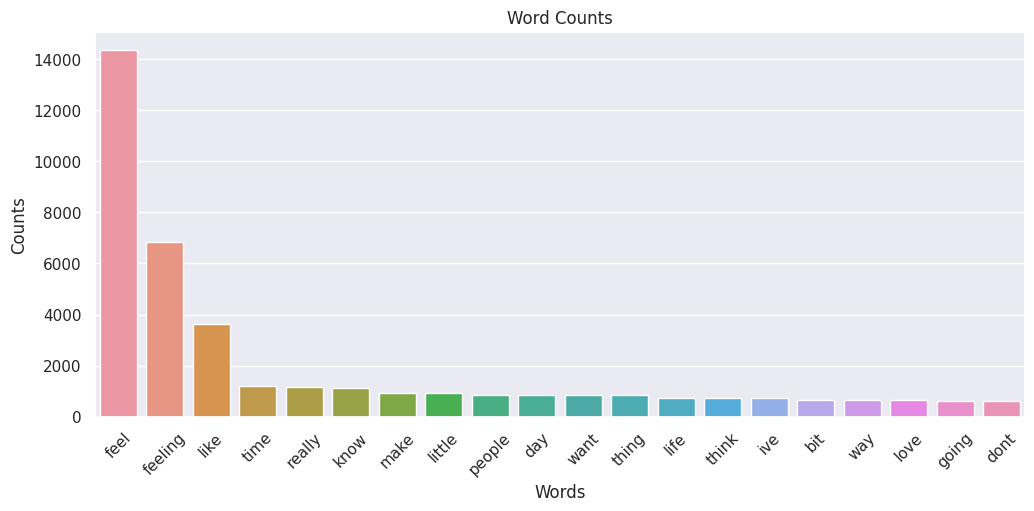

In [ ]:
word_count_set  = emotion_word_count(data_comp)
words = word_count_set[0]
count = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Word Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words[:20], y = count[:20])

# Top 20 Words in the DataSet( excluding "Feel", "Feeling" and "Like")

{'aa': 3, 'aaaaaaand': 1, 'aaaaand': 1, 'aaaah': 1, 'aaaand': 1, 'aac': 1, 'aahhh': 1, 'aaron': 1, 'ab': 1, 'abandon': 4, 'abandoned': 13, 'abandoning': 4, 'abandonment': 4, 'abated': 1, 'abba': 1, 'abbigail': 1, 'abc': 4, 'abdomen': 4, 'abdominal': 1, 'abducted': 1, 'abelard': 1, 'abhorrent': 1, 'abide': 3, 'ability': 43, 'abit': 7, 'able': 222, 'ableness': 1, 'ablo': 1, 'abnormally': 1, 'aboard': 1, 'abominable': 1, 'abortion': 1, 'abou': 2, 'abound': 1, 'abraham': 1, 'abroad': 3, 'abruptly': 1, 'absence': 5, 'absoloutely': 1, 'absolute': 6, 'absolutely': 78, 'absolutly': 1, 'absorbed': 1, 'absorption': 1, 'abstain': 1, 'abstinence': 1, 'abstract': 2, 'absurd': 3, 'absurdity': 1, 'abt': 1, 'abundance': 1, 'abundantly': 1, 'abuse': 10, 'abused': 50, 'abusing': 1, 'abusive': 3, 'abyss': 3, 'ac': 1, 'academia': 2, 'academic': 6, 'academy': 1, 'acause': 1, 'accelerated': 1, 'accent': 3, 'accentuating': 1, 'accept': 23, 'acceptable': 61, 'acceptance': 10, 'accepted': 146, 'accepting': 11,

<Axes: title={'center': 'Top 20 Words: Complete Data'}, xlabel='Words', ylabel='Counts'>

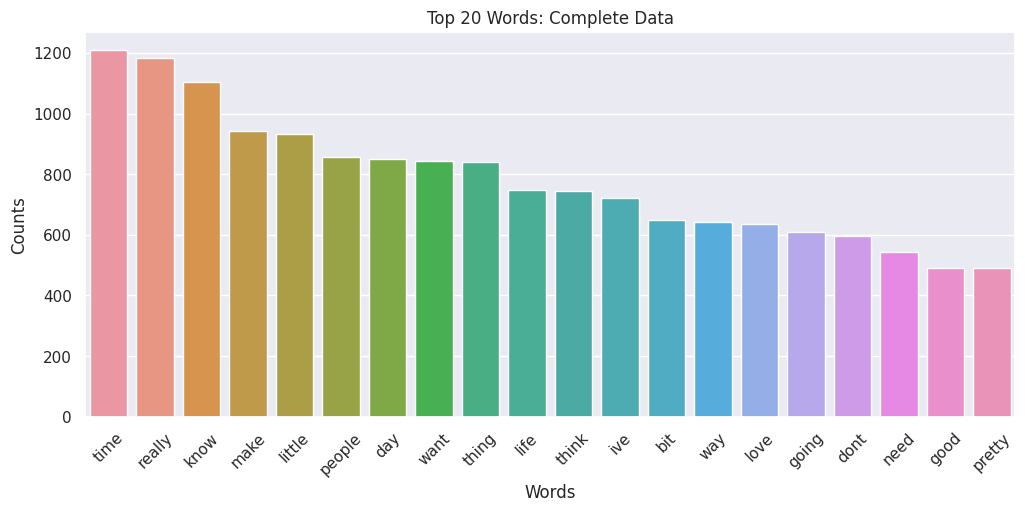

In [ ]:
word_count_set  = emotion_word_count(data_comp)
words = word_count_set[0]
count = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: Complete Data')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words[3:23], y = count[3:23])

# Visualizing top words used according to emotion

In [ ]:
data_comp["emotion"].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
# Creating separate Pandas DataFrames according to each emotion category
df_sadness = data_comp[data_comp["emotion"] == "sadness"].reset_index(drop = True)
df_anger = data_comp[data_comp["emotion"] == "anger"].reset_index(drop = True)
df_love = data_comp[data_comp["emotion"] == "love"].reset_index(drop = True)
df_surprise = data_comp[data_comp["emotion"] == "surprise"].reset_index(drop = True)
df_fear = data_comp[data_comp["emotion"] == "fear"].reset_index(drop = True)
df_joy = data_comp[data_comp["emotion"] == "joy"].reset_index(drop = True)

## Top 20 words used in "Sadness" tagged text

{'aa': 1, 'aaaaand': 1, 'abandon': 1, 'abandoned': 8, 'abandoning': 1, 'abandonment': 2, 'abc': 1, 'abdomen': 2, 'abdominal': 1, 'abducted': 1, 'ability': 9, 'abit': 4, 'able': 49, 'ablo': 1, 'aboard': 1, 'abortion': 1, 'abou': 1, 'abroad': 2, 'absence': 2, 'absoloutely': 1, 'absolute': 1, 'absolutely': 23, 'absurd': 3, 'abuse': 7, 'abused': 49, 'abusing': 1, 'abusive': 1, 'abyss': 2, 'ac': 1, 'academia': 1, 'academic': 1, 'accept': 6, 'acceptable': 2, 'acceptance': 2, 'accepted': 4, 'accepting': 6, 'access': 1, 'accident': 7, 'accidentally': 3, 'accommodate': 2, 'accompanied': 1, 'accompany': 1, 'accomplish': 1, 'accomplished': 3, 'accomplishing': 1, 'accomplishment': 6, 'according': 2, 'accrue': 1, 'accuses': 2, 'accustomed': 1, 'ace': 1, 'ache': 17, 'ached': 2, 'achieve': 5, 'achieved': 2, 'achievement': 1, 'aching': 70, 'achy': 1, 'acid': 1, 'acknowledge': 2, 'acknowledged': 1, 'acknowledgement': 1, 'acne': 1, 'act': 7, 'acted': 3, 'acting': 5, 'action': 5, 'active': 4, 'actively':

<Axes: title={'center': 'Top 20 Words: sadness'}, xlabel='Words', ylabel='Counts'>

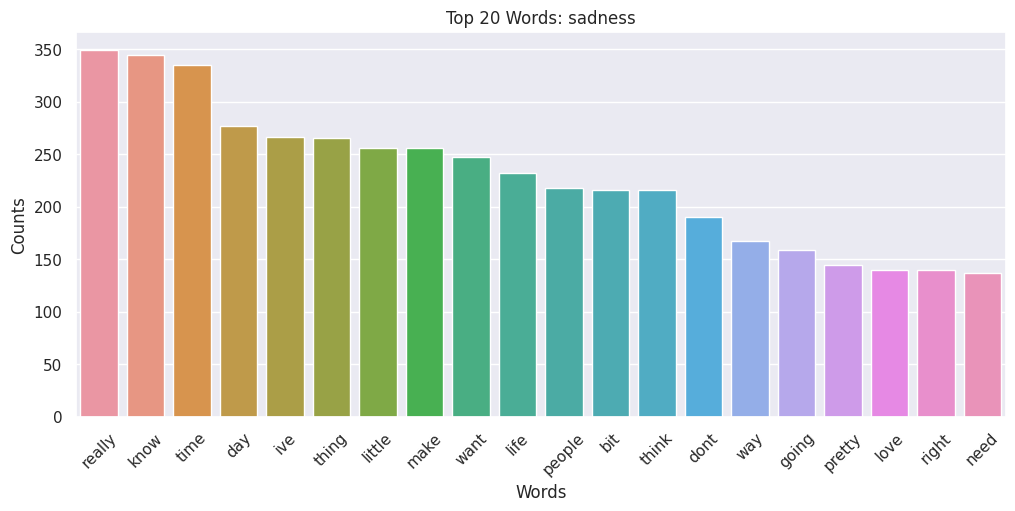

In [ ]:
word_count_set  = emotion_word_count(df_sadness)
words_sadness = word_count_set[0]
count_sadness = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: sadness')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words_sadness[3:23], y = count_sadness[3:23])

## Top 20 words used in "Anger" tagged text

{'aa': 1, 'aac': 1, 'aaron': 1, 'abandon': 1, 'abandoned': 3, 'abandonment': 1, 'abhorrent': 1, 'abide': 1, 'ability': 3, 'abit': 2, 'able': 23, 'absolute': 1, 'absolutely': 8, 'abstract': 1, 'abt': 1, 'abuse': 2, 'abusive': 1, 'abyss': 1, 'academia': 1, 'accelerated': 1, 'accentuating': 1, 'accept': 6, 'acceptance': 1, 'accepted': 1, 'accepts': 1, 'access': 1, 'accessory': 1, 'accident': 1, 'accidentally': 1, 'accompanied': 1, 'accomplish': 1, 'accomplished': 2, 'accomplishment': 1, 'according': 1, 'account': 2, 'acctually': 1, 'accumulation': 1, 'accurate': 1, 'accusing': 1, 'accustomed': 1, 'ache': 3, 'achieve': 1, 'achieved': 1, 'acknowledge': 1, 'acquainted': 1, 'acquired': 1, 'act': 15, 'acted': 4, 'acting': 3, 'action': 12, 'active': 1, 'actively': 1, 'activist': 1, 'activity': 2, 'actual': 4, 'actuality': 1, 'actually': 31, 'ad': 1, 'adaption': 1, 'add': 3, 'added': 1, 'addicted': 1, 'addictive': 1, 'adding': 3, 'addition': 1, 'address': 1, 'adequately': 2, 'administration': 2,

<Axes: title={'center': 'Top 20 Words: anger'}, xlabel='Words', ylabel='Counts'>

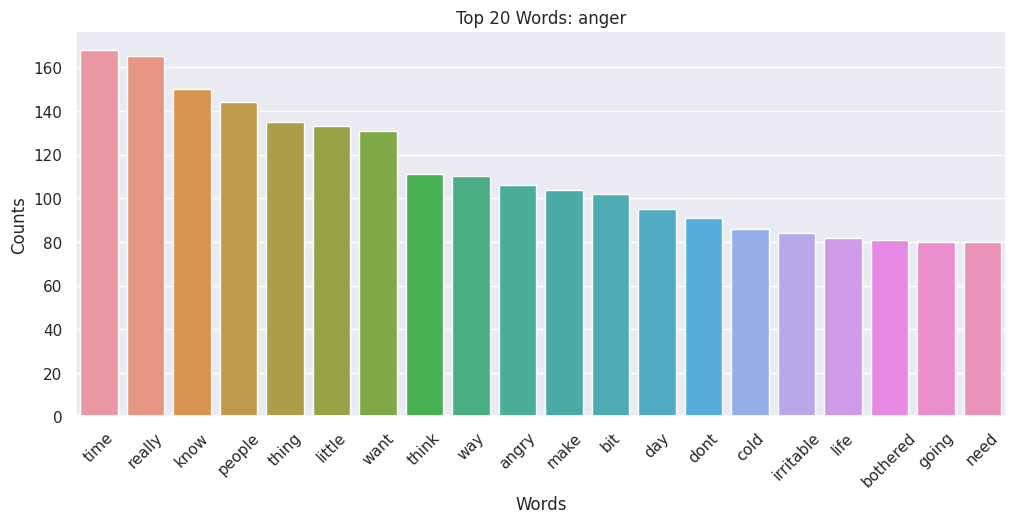

In [ ]:
word_count_set  = emotion_word_count(df_anger)
words_anger = word_count_set[0]
count_anger = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: anger')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words_anger[3:23], y = count_anger[3:23])

## Top 20 words used in "Love" tagged text

{'aahhh': 1, 'abandoned': 1, 'abandoning': 1, 'abba': 1, 'ability': 3, 'able': 11, 'absolute': 1, 'absolutely': 4, 'abundantly': 1, 'abusive': 1, 'accent': 1, 'accept': 1, 'acceptable': 1, 'acceptance': 2, 'accepted': 60, 'accepting': 1, 'accord': 1, 'according': 1, 'accurately': 1, 'accustomed': 1, 'ache': 3, 'achieved': 1, 'achievement': 1, 'achieving': 1, 'aching': 1, 'achy': 1, 'acknowledge': 1, 'acne': 1, 'acquaintance': 1, 'act': 5, 'acted': 1, 'action': 3, 'actively': 1, 'actual': 4, 'actually': 17, 'acutely': 1, 'ad': 1, 'adapt': 1, 'add': 7, 'added': 2, 'addiction': 2, 'admiration': 1, 'admire': 2, 'admired': 11, 'admiring': 1, 'admit': 8, 'admitting': 1, 'adopt': 1, 'adopting': 1, 'adore': 3, 'adoring': 4, 'adult': 2, 'advent': 1, 'adventure': 3, 'adverse': 1, 'adversely': 1, 'advise': 1, 'advocating': 1, 'aesthetic': 1, 'affection': 2, 'affectionate': 14, 'affirmed': 2, 'afraid': 5, 'afternoon': 1, 'age': 5, 'aging': 1, 'ago': 9, 'agree': 5, 'agreement': 1, 'ah': 2, 'ahaha':

<Axes: title={'center': 'Top 20 Words: love'}, xlabel='Words', ylabel='Counts'>

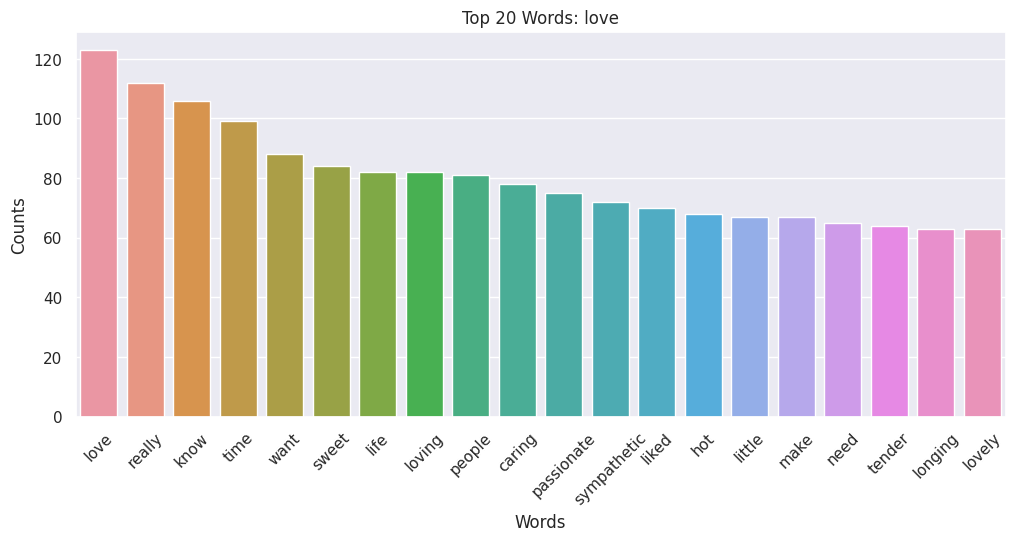

In [ ]:
word_count_set  = emotion_word_count(df_love)
words_love = word_count_set[0]
count_love = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: love')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words_love[3:23], y = count_love[3:23])

## Top 20 words used in "Surprise" tagged text

{'ability': 3, 'able': 5, 'absolute': 1, 'absolutely': 5, 'academic': 1, 'academy': 1, 'access': 1, 'accessary': 1, 'accessory': 1, 'accidentally': 1, 'accomplishing': 1, 'account': 1, 'accusation': 1, 'ache': 1, 'achieve': 1, 'achieved': 1, 'act': 4, 'action': 2, 'actively': 1, 'activity': 1, 'actor': 1, 'actually': 19, 'ad': 1, 'adam': 1, 'adapt': 1, 'add': 2, 'adding': 2, 'adf': 1, 'adjective': 1, 'adjoining': 1, 'adjust': 1, 'admire': 1, 'admit': 6, 'admitting': 1, 'adoration': 1, 'adrasteius': 1, 'adult': 1, 'adventure': 4, 'advice': 1, 'advocate': 1, 'affair': 1, 'affected': 1, 'afraid': 1, 'afternoon': 1, 'age': 4, 'ageing': 1, 'agent': 2, 'aggravating': 1, 'ago': 1, 'ahead': 1, 'aid': 1, 'aimless': 1, 'air': 1, 'ala': 1, 'alarming': 1, 'album': 1, 'alene': 1, 'alexander': 1, 'algebra': 1, 'alive': 1, 'ally': 1, 'alot': 1, 'altogether': 1, 'amazed': 83, 'amazing': 56, 'amazingly': 1, 'amazon': 1, 'ambulance': 1, 'america': 1, 'amish': 1, 'amp': 3, 'analysis': 1, 'ancestral': 2, 

<Axes: title={'center': 'Top 20 Words: surprise'}, xlabel='Words', ylabel='Counts'>

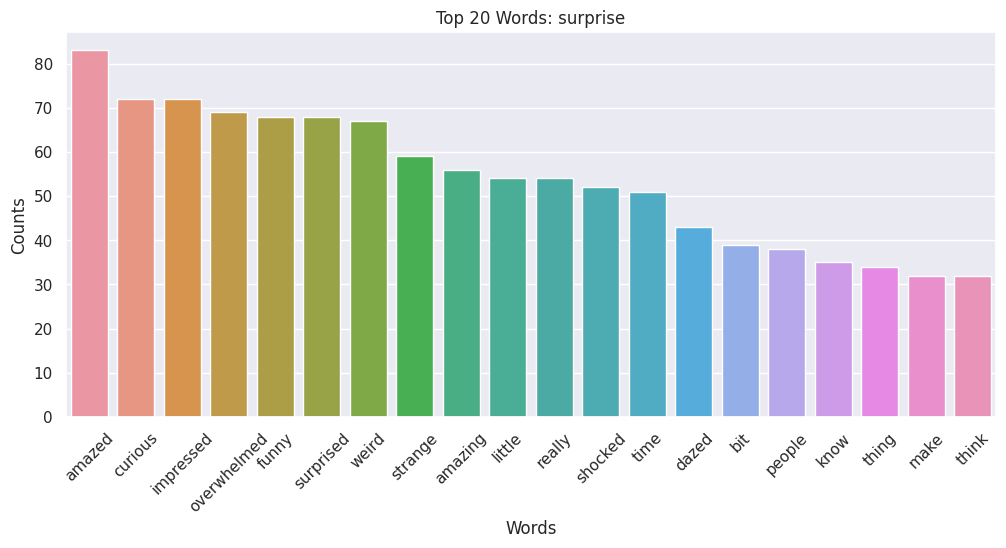

In [ ]:
word_count_set  = emotion_word_count(df_surprise)
words_surprise = word_count_set[0]
count_surprise = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: surprise')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words_surprise[3:23], y = count_surprise[3:23])

## Top 20 words used in "Fear" tagged text

{'aa': 1, 'abandon': 1, 'abandoned': 1, 'abandoning': 1, 'abbigail': 1, 'abc': 1, 'abdomen': 1, 'ability': 4, 'abit': 1, 'able': 32, 'abnormally': 1, 'abou': 1, 'abruptly': 1, 'absolutely': 9, 'academic': 1, 'accept': 1, 'accepted': 4, 'accepting': 3, 'accident': 5, 'accidentally': 1, 'acclimated': 1, 'accomplish': 1, 'accomplished': 1, 'accomplishment': 1, 'according': 2, 'account': 1, 'accounted': 1, 'accustomed': 1, 'ache': 1, 'achieve': 1, 'achievement': 2, 'aching': 1, 'acknowledge': 1, 'acne': 1, 'acronym': 1, 'act': 6, 'acting': 1, 'action': 2, 'active': 2, 'activity': 4, 'actress': 1, 'actual': 1, 'actually': 36, 'acutely': 1, 'ad': 2, 'add': 8, 'added': 2, 'adding': 1, 'addition': 1, 'addressing': 2, 'admin': 1, 'administration': 1, 'admiration': 1, 'admit': 19, 'admitted': 2, 'admitting': 1, 'adn': 1, 'adopt': 1, 'adoption': 1, 'adress': 1, 'adult': 3, 'adulthood': 1, 'advance': 1, 'advantage': 1, 'adventure': 1, 'advertising': 1, 'advice': 1, 'advocate': 1, 'affair': 1, 'aff

<Axes: title={'center': 'Top 20 Words: fear'}, xlabel='Words', ylabel='Counts'>

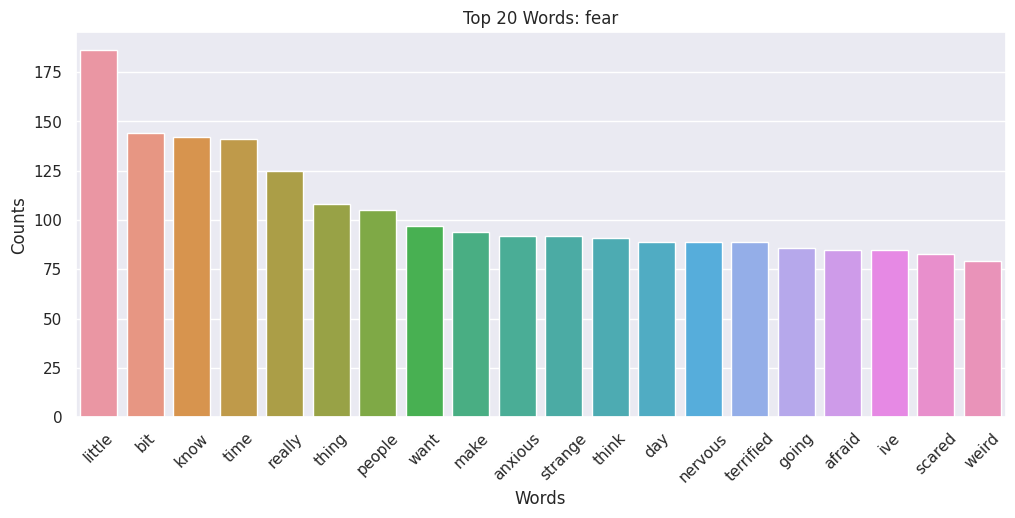

In [ ]:
word_count_set  = emotion_word_count(df_fear)
words_fear = word_count_set[0]
count_fear = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: fear')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words_fear[3:23], y = count_fear[3:23])

## Top 20 words used in "Joy" tagged text

{'aaaaaaand': 1, 'aaaah': 1, 'aaaand': 1, 'ab': 1, 'abandon': 1, 'abandoning': 1, 'abandonment': 1, 'abated': 1, 'abc': 2, 'abdomen': 1, 'abelard': 1, 'abide': 2, 'ability': 21, 'able': 102, 'ableness': 1, 'abominable': 1, 'abound': 1, 'abraham': 1, 'abroad': 1, 'absence': 3, 'absolute': 2, 'absolutely': 29, 'absolutly': 1, 'absorbed': 1, 'absorption': 1, 'abstain': 1, 'abstinence': 1, 'abstract': 1, 'absurdity': 1, 'abundance': 1, 'abuse': 1, 'abused': 1, 'academic': 3, 'acause': 1, 'accent': 2, 'accept': 9, 'acceptable': 58, 'acceptance': 5, 'accepted': 77, 'accepting': 1, 'access': 3, 'accessibility': 1, 'accessible': 1, 'accessory': 3, 'accidentally': 2, 'acco': 1, 'accommodate': 2, 'accommodation': 1, 'accompaniment': 1, 'accompany': 1, 'accomplish': 3, 'accomplished': 13, 'accomplishing': 4, 'accomplishment': 5, 'accordance': 1, 'according': 1, 'account': 2, 'accounted': 1, 'accumulate': 1, 'accumulated': 1, 'accurate': 1, 'accurately': 1, 'accused': 1, 'accuser': 1, 'ache': 4, '

<Axes: title={'center': 'Top 20 Words: joy'}, xlabel='Words', ylabel='Counts'>

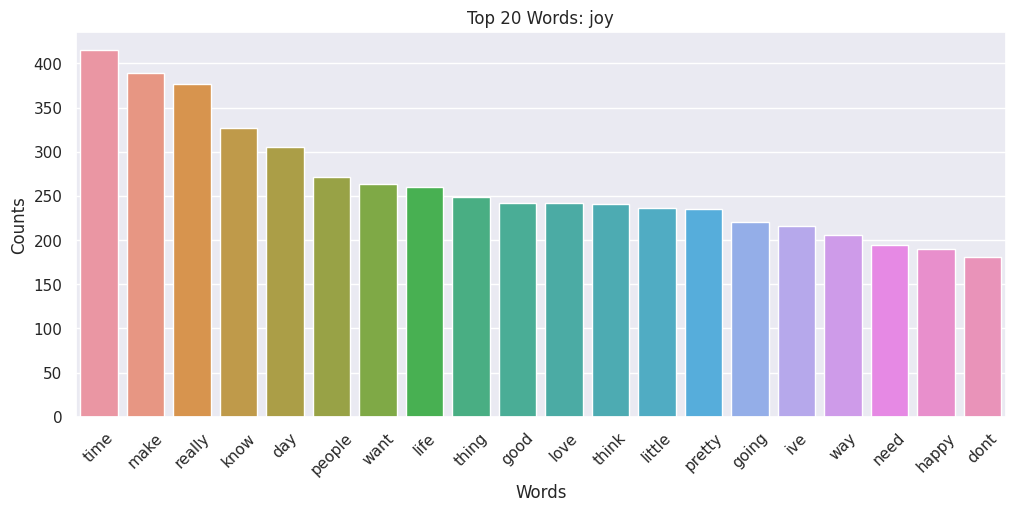

In [ ]:
word_count_set  = emotion_word_count(df_joy)
words_joy = word_count_set[0]
count_joy = word_count_set[1]
plt.figure(figsize=(12,5))
plt.title('Top 20 Words: joy')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
sns.barplot(x = words_joy[3:23], y = count_joy[3:23])

## Note
* "Feel", "Feeling" and "Like" were the most used words throughout the dataset as well as in each and every feeling.
* In order to get a clearer picture of the kind of words used in each of the 6 emotions we have considered the top words from the 3rd word to the 23rd word i.e. ignoring the words "Feel", "Feeling" and "Like"

# Extracting and Analyzing Sentiments

In [ ]:
df_sentiment = data_comp.copy()

In [ ]:
from textblob import TextBlob # used for polarity
from nltk.sentiment import SentimentIntensityAnalyzer # used for neg, neu, pos, compound
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
dfs = [df_sadness, df_anger, df_love, df_surprise, df_fear, df_joy]
for i in dfs:
  pol, neg, neu, pos, compound, subjectivity = [], [], [] ,[] ,[], []
  for j in range(len(i["text"])):
    blob = TextBlob(i["text"][j])
    sentiment = sia.polarity_scores(i["text"][j]) # Extracting neg, neu, pos, compound
    polarity = blob.sentiment.polarity  # Extracting polarity
    subjectivity_val = TextBlob(i["text"][j]).sentiment.subjectivity # Extracting Subjectivity
    # appending all values t their respective lists
    pol.append(polarity)
    neg.append(sentiment["neg"])
    neu.append(sentiment["neu"])
    pos.append(sentiment["pos"])
    compound.append(sentiment["compound"])
    subjectivity.append(subjectivity_val)
  # Updating each DataFrame with it's respective sentiment values
  i["polarity"] = pol
  i["neg"] = neg
  i["neu"] = neu
  i["pos"] = pos
  i["compound"] = compound
  i["subjectivity"] = subjectivity
  

In [ ]:
df_sadness

,text,emotion,polarity,neg,neu,pos,compound,subjectivity
0,didnt feel humiliated,sadness,0.000000,0.000,0.496,0.504,0.2584,0.000000
1,go feeling hopeless damned hopeful around some...,sadness,0.000000,0.318,0.227,0.455,0.3400,0.000000
2,ive feeling little burdened lately wasnt sure,sadness,0.004167,0.443,0.405,0.152,-0.4346,0.662963
3,feel like make suffering seeing mean something,sadness,-0.312500,0.292,0.472,0.236,-0.1531,0.687500
4,feel low energy thirsty,sadness,0.000000,0.339,0.323,0.339,0.0000,0.300000
...,...,...,...,...,...,...,...,...
5792,thinking well could bit smaller health reason ...,sadness,0.000000,0.222,0.556,0.222,-0.2500,0.288462
5793,found fighting back wake sleep time time feeli...,sadness,0.250000,0.404,0.348,0.248,-0.5574,0.311111
5794,feel defeated take advil suppose get inflammat...,sadness,0.000000,0.218,0.634,0.148,-0.2500,0.525000
5795,kinda feeling ignored,sadness,0.000000,0.478,0.236,0.285,-0.2058,0.000000


## Extracting all average values for each extracted sentiment value

In [ ]:
pol, neg, neu, pos, compound, subjectivity = [], [], [] ,[] ,[], []
cols = data_comp["emotion"].unique()
dfs = [df_sadness, df_anger, df_love, df_surprise, df_fear, df_joy]
sentiment = pd.DataFrame()
for i in dfs:
  pol.append(i["polarity"].mean())
  neg.append(i["neg"].mean())
  neu.append(i["neu"].mean())
  pos.append(i["pos"].mean())
  compound.append(i["compound"].mean())
  subjectivity.append(i["subjectivity"].mean())

sentiment["emotion"] = cols
sentiment["polarity"] = pol
sentiment["neg"] = neg
sentiment["neu"] = neu
sentiment["pos"] = pos
sentiment["compound"] = compound
sentiment["subjectivity"] = subjectivity

In [ ]:
sentiment

,emotion,polarity,neg,neu,pos,compound,subjectivity
0,sadness,-0.124325,0.362739,0.449715,0.187552,-0.225875,0.482777
1,anger,-0.119803,0.352361,0.466511,0.181130,-0.249565,0.471010
2,love,0.168347,0.078303,0.494531,0.427166,0.477098,0.568432
3,surprise,0.053170,0.145601,0.511512,0.342861,0.269045,0.611838
4,fear,-0.078869,0.314107,0.496656,0.189241,-0.143290,0.453530
5,joy,0.249648,0.060459,0.468162,0.471382,0.529765,0.545340


In [ ]:
import plotly.graph_objects as go

# Define the categories and values for the bar charts
categories = list(sentiment["emotion"])
values1 = list(sentiment.iloc[0,1 : ])
values2 = list(sentiment.iloc[1,1 : ])
values3 = list(sentiment.iloc[2,1 : ])
values4 = list(sentiment.iloc[3,1 : ])
values5 = list(sentiment.iloc[4,1 : ])
values6 = list(sentiment.iloc[5,1 : ])


# Define custom colors for the bars
colors = [ '#0000FF','#FF0000',  '#FFA500','#008000', '#800080', '#300080', '#800080']

# Define hover text for the bars
hover_text = ['Polarity', 'Negativity', 'Neutrality', 'Positivity', 'Compound', "Subjectivity"]

# Create a list of bar chart objects with custom names
bars = []
for i in range(6):
    bars.append(go.Bar(x=categories, y=[values1[i], values2[i], values3[i], values4[i], values5[i], values6[i]],
                       marker_color=colors[i], hovertext=hover_text[i], name=hover_text[i]))

# Create a layout object
layout = go.Layout(barmode='group', title='Comparing Sentiments for every emotion', xaxis=dict(title='Categories'),
                   yaxis=dict(title='Values'))

# Create a figure object
fig = go.Figure(data=bars, layout=layout)

# Add hover effects to the figure
fig.update_layout(hovermode='x', hoverdistance=100, spikedistance=1000)

# Show the figure
fig.show()


# Modeling

In [ ]:
# Preparing dataframe for modeling
pol, neg, neu, pos, compound, subjectivity = [], [], [] ,[] ,[], []
for i in df_sentiment["text"]:
  blob = TextBlob(i)
  sentiment = sia.polarity_scores(i)
  polarity = blob.sentiment.polarity
  subjectivity_val = TextBlob(i).sentiment.subjectivity
  pol.append(polarity)
  neg.append(sentiment["neg"])
  neu.append(sentiment["neu"])
  pos.append(sentiment["pos"])
  compound.append(sentiment["compound"])
  subjectivity.append(subjectivity_val)
df_sentiment["polarity"] = pol
df_sentiment["neg"] = neg
df_sentiment["neu"] = neu
df_sentiment["pos"] = pos
df_sentiment["compound"] = compound
df_sentiment["subjectivity"] = subjectivity

In [ ]:
df_sentiment

,text,emotion,polarity,neg,neu,pos,compound,subjectivity
0,didnt feel humiliated,sadness,0.00000,0.000,0.496,0.504,0.2584,0.000
1,go feeling hopeless damned hopeful around some...,sadness,0.00000,0.318,0.227,0.455,0.3400,0.000
2,grabbing minute post feel greedy wrong,anger,-0.50000,0.574,0.426,0.000,-0.6597,0.900
3,ever feeling nostalgic fireplace know still pr...,love,-0.50000,0.000,0.800,0.200,0.1280,1.000
4,feeling grouchy,anger,0.00000,0.659,0.000,0.341,-0.3400,0.000
...,...,...,...,...,...,...,...,...
1995,keep feeling like someone unkind wrong think g...,anger,-0.25000,0.341,0.419,0.240,-0.4019,0.450
1996,feeling little cranky negative doctor appointment,anger,-0.24375,0.384,0.448,0.168,-0.4445,0.450
1997,feel useful people give great feeling achievement,joy,0.55000,0.000,0.320,0.680,0.8176,0.375
1998,feeling comfortable derby feel though start st...,joy,0.40000,0.000,0.556,0.444,0.5859,0.800


In [ ]:
df_sentiment.columns

Index(['text', 'emotion', 'polarity', 'neg', 'neu', 'pos', 'compound',
       'subjectivity'],
      dtype='object')

In [ ]:
df_no_sadness = df_anger.copy().append(df_joy).append(df_surprise).append(df_fear).append(df_love)#62
df_no_anger = df_sadness.copy().append(df_love).append(df_surprise).append(df_fear).append(df_joy)#61
df_no_joy = df_sadness.copy().append(df_anger).append(df_love).append(df_surprise).append(df_fear)#52
df_no_fear = df_sadness.copy().append(df_love).append(df_surprise).append(df_anger).append(df_joy)#61
df_no_love = df_sadness.copy().append(df_anger).append(df_surprise).append(df_fear).append(df_joy)#59
df_no_suprise = df_sadness.copy().append(df_love).append(df_anger).append(df_fear).append(df_joy)#56


dfx1= df_anger.copy().append(df_love).append(df_fear).append(df_joy)#66- without anger # 64- without sadness
#dfx = df_joy.copy().append(df_love).append(df_surprise)#.append(df_fear).append(df_sadness)
#dfx = df_joy.copy().append(df_fear).append(df_love).append(df_surprise)#.append(df_fear).append(df_sadness)
#dfx = df_joy.copy().append(df_angre).append(df_love).append(df_surprise).append(df_fear).append(df_sadness)

# Model

In [ ]:
df_model = df_sentiment.copy()
anger = list(df_model["emotion"])
for i in range(len(anger)):
  if anger[i] == "anger":
    anger[i] = "sadness"
df_model["emotion"] = anger

In [ ]:
df_sentiment

,text,emotion,polarity,neg,neu,pos,compound,subjectivity
0,didnt feel humiliated,sadness,0.00000,0.000,0.496,0.504,0.2584,0.000
1,go feeling hopeless damned hopeful around some...,sadness,0.00000,0.318,0.227,0.455,0.3400,0.000
2,grabbing minute post feel greedy wrong,anger,-0.50000,0.574,0.426,0.000,-0.6597,0.900
3,ever feeling nostalgic fireplace know still pr...,love,-0.50000,0.000,0.800,0.200,0.1280,1.000
4,feeling grouchy,anger,0.00000,0.659,0.000,0.341,-0.3400,0.000
...,...,...,...,...,...,...,...,...
1995,keep feeling like someone unkind wrong think g...,anger,-0.25000,0.341,0.419,0.240,-0.4019,0.450
1996,feeling little cranky negative doctor appointment,anger,-0.24375,0.384,0.448,0.168,-0.4445,0.450
1997,feel useful people give great feeling achievement,joy,0.55000,0.000,0.320,0.680,0.8176,0.375
1998,feeling comfortable derby feel though start st...,joy,0.40000,0.000,0.556,0.444,0.5859,0.800


In [ ]:
df_model1 = df_sentiment.copy()
em = list(df_model1["emotion"])
for i in range(len(anger)):
  if em[i] == "joy":
    em[i] = "love"
  if em[i] == "anger":
    em[i] = "sadness"
df_model1["emotion"] = em

# Random Forest Classifier with Feature Selection

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
# Load the data into a pandas DataFrame
#df = dfx1.copy()
#df = df_sentiment.copy()
df = df_model1.copy()
# Define the feature and target variables
X = df[[ 'compound', 'neg', 'neu', 'pos', 'polarity', "subjectivity"]]
# X = df[[ 'compound',  'pos', 'polarity']]

y = df['emotion']

# Feature Selection
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=5)
X = rfe.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Hyperparameter Tuning
params = {'n_estimators': [100, 150, 250], 'max_depth': [5, 10, 15]}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
rfc_best = grid_search.best_estimator_

# Train the classifier on the training data
rfc_best.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = rfc_best.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy of the Random Forest Classifier is: {accuracy:.2f}')

# Calculate precision, recall, and F1 score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1_score = f1_score(y_test, y_pred, average=None)

# Print the results
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1_score}')



The accuracy of the Random Forest Classifier is: 0.71
Precision: [0.50847458 0.77977528 0.66108787 0.3       ]
Recall: [0.0610998  0.82227488 0.85611078 0.01875   ]
F1 score: [0.10909091 0.80046136 0.74606506 0.03529412]


In [ ]:
df.emotion.unique()

array(['sadness', 'love', 'surprise', 'fear'], dtype=object)

In [ ]:
table_heads = "\t\t{}\t\t{}\t\t{}\t{}"
metrics = [precision, recall, f1_score]
metric_names = ["precision", "recall   ", "f1-score"]
print(table_heads.format('sadness', 'love', 'surprise', 'fear'))
for i in range(len(metric_names)):
  print(metric_names[i] + "\t", end = "")
  for j in range(len(metrics[i])):
    print(str(round(metrics[i][j], 3)) + "\t\t", end = "")
  print("")


		sadness		love		surprise	fear
precision	0.508		0.78		0.661		0.3		
recall   	0.061		0.822		0.856		0.019		
f1-score	0.109		0.8		0.746		0.035		


# Inferences
* We can obesrve that the classifier does not do well with classifying "sadness" and "fear".
* A possible reason for this could be the similar sentiment values for both of these emotions(or categories)
* There could be two ways to improve this,
  * Increase the amount of labelled text data for training with a higher number of rows for each emotion
  * Involve Image data of people's expressions while saying these sentences to be able to differentiate correctly between each emotion